C:\Users\haime\AppData\Local\Temp\ipykernel_24068\1194481718.py:32: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


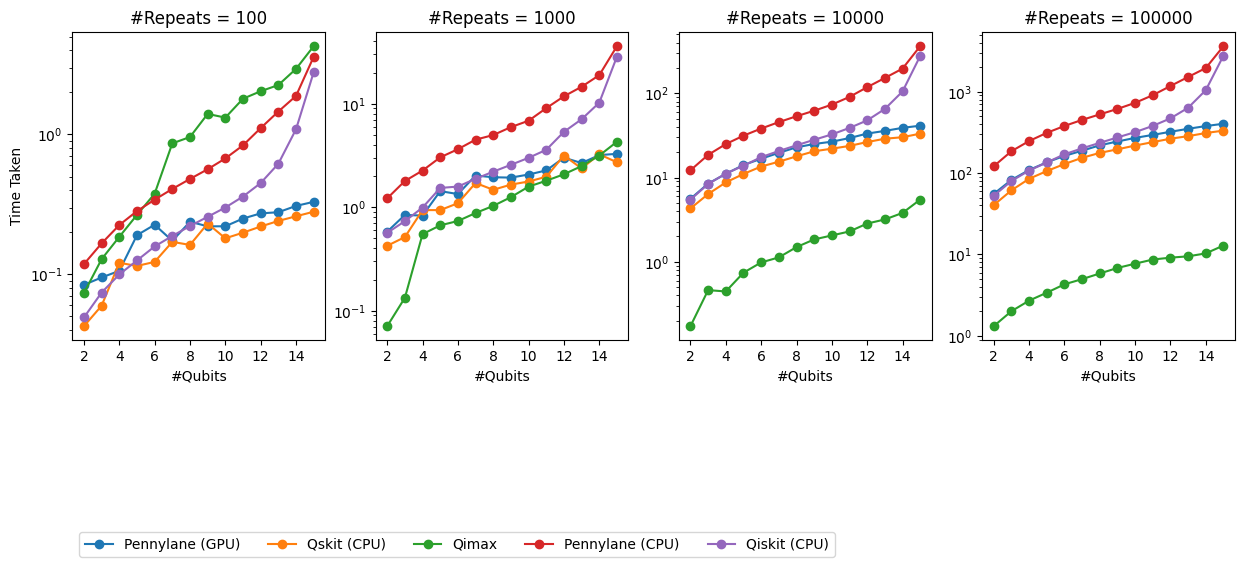

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV files
pennylane = pd.read_csv('./data/qml_rtx4090/time_num_layers2_xyzcx_pennylane_gpu.csv')
qiskit = pd.read_csv('./data/qml_rtx4090/time_num_layers2_xyzcx_qiskit_gpu.csv')
qimax = pd.read_csv('./data/qml_rtx4090/time_num_layers2_xyzcx_qimax.csv')
pennylane_cpu = pd.read_csv('./data/qml_cpu/time_num_layers2_xyzcx_pennylane_cpu.csv')
qiskit_cpu = pd.read_csv('./data/qml_cpu/time_num_layers2_xyzcx_qiskit_cpu.csv')
# Define the unique num_repeats values for subplots
num_repeats_values = [100, 1000, 10000, 100000]

# Create subplots
fig, axes = plt.subplots(1, len(num_repeats_values), figsize=(15, 4))

# Plot data from each file
for i, num_repeats in enumerate(num_repeats_values):
    ax = axes[i]
    for file, label in zip([pennylane, qiskit, qimax, pennylane_cpu, qiskit_cpu], 
                           ['Pennylane (GPU)', 'Qskit (CPU)', 'Qimax (GPU)', 'Pennylane (CPU)', 'Qiskit (CPU)']):
        subset = file[file['num_repeats'] == num_repeats]
        ax.plot(subset['num_qubits'], subset['time_taken'], marker='o', linestyle='-', label=label)
    ax.set_title(f'#Repeats = {num_repeats}')
    ax.set_xlabel('#Qubits')
    if i == 0:
        ax.set_ylabel('Time Taken')
        ax.legend(loc='upper left', ncol = 5, bbox_to_anchor=(0, -0.6))
    ax.set_yscale('log')
    ax.set_xticks(range(2, 16, 2))

plt.tight_layout()
plt.show()
